# 8: K-NEAREST NEIGHBOURS

******************** For k = 3 ****************************
Accuracy :76.78571428571429%
Confusion Matrix:
 [[62 13]
 [13 24]]
******************** For k = 7 ****************************
Accuracy :81.25%
Confusion Matrix:
 [[64 11]
 [10 27]]
******************** For k = 11 ****************************
Accuracy :79.46428571428571%
Confusion Matrix:
 [[65 10]
 [13 24]]
******************** For k = 15 ****************************
Accuracy :84.82142857142857%
Confusion Matrix:
 [[66  9]
 [ 8 29]]
******************** For k = 19 ****************************
Accuracy :81.25%
Confusion Matrix:
 [[67  8]
 [13 24]]
******************** For k = 23 ****************************
Accuracy :83.03571428571429%
Confusion Matrix:
 [[69  6]
 [13 24]]
******************** For k = 27 ****************************
Accuracy :78.57142857142857%
Confusion Matrix:
 [[63 12]
 [12 25]]
******************** For k = 31 ****************************
Accuracy :78.57142857142857%
Confusion Matrix:
 [[64 11]
 [13 24]]
**

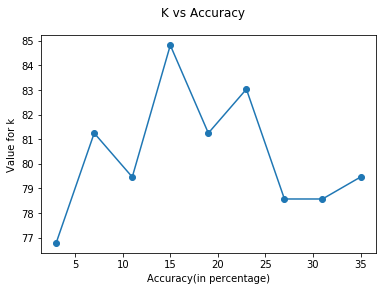

In [2]:
import pandas as pd
import numpy as np
import math
import random
import operator
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

data_2C = pd.read_csv("column_2C_weka.csv")
colnames_numeric = data_2C.columns[0:6]
scaler = MinMaxScaler()
data_2C[colnames_numeric] = scaler.fit_transform(data_2C[colnames_numeric])
df = data_2C.values.tolist()

def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

trainingSet = []
testSet = []
split = 0.66
train_test_split(df, split, trainingSet, testSet)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

k = [3,7,11,15,19,23,27,31,35]
accuracy = [0,0,0,0,0,0,0,0,0]
sets=np.array(testSet)
testY = sets[:,6]
for i in range(len(k)):
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy[i] = getAccuracy(testSet, predictions)
    print('******************** For k = ' +repr(k[i])+ ' ****************************')
    print('Accuracy :' + repr(accuracy[i]) + '%')
    print('Confusion Matrix:\n',confusion_matrix(testY.T, np.array(predictions)))
maxi = max(accuracy)
ind = accuracy.index(maxi)
print('\n\nMax accuracy = ' + repr(maxi) + ' for k = ' + repr(k[ind]))
plt.plot(k,accuracy,marker = 'o')
plt.xlabel('Accuracy(in percentage)')
plt.ylabel('Value for k')
plt.suptitle('K vs Accuracy')
plt.show()

Submitted By:
Sachin Rawat
RA1912039010003
Big Data Analytics